In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
df=pd.read_csv("C:/Users/Dell/Downloads/Data Science Track/weatherAUS.csv/weatherAUS.csv")

In [3]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values:")
for col, count in missing_values.items():
    if count > 0:
        print(f"{col}: {count} missing")
        
if missing_values.sum() == 0:
    print("No missing values!")

Missing values:
MinTemp: 1485 missing
MaxTemp: 1261 missing
Rainfall: 3261 missing
Evaporation: 62790 missing
Sunshine: 69835 missing
WindGustDir: 10326 missing
WindGustSpeed: 10263 missing
WindDir9am: 10566 missing
WindDir3pm: 4228 missing
WindSpeed9am: 1767 missing
WindSpeed3pm: 3062 missing
Humidity9am: 2654 missing
Humidity3pm: 4507 missing
Pressure9am: 15065 missing
Pressure3pm: 15028 missing
Cloud9am: 55888 missing
Cloud3pm: 59358 missing
Temp9am: 1767 missing
Temp3pm: 3609 missing
RainToday: 3261 missing
RainTomorrow: 3267 missing


In [4]:
# drop columns with many nulls
cols_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df.drop(columns=cols_to_drop, inplace=True)
print("dropped", cols_to_drop)


dropped ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [6]:
# fill numeric null columns with median (to avoid outliers)
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# fill categorical null columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
#convert Date column to date type
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
#handle outliers with IQR 
import pandas as pd

def remove_outliers_iqr(df):

    df_clean = df.copy()
    
    
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
       
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean


In [10]:
df_clean = remove_outliers_iqr(df)
print(df_clean.shape)

(104811, 19)


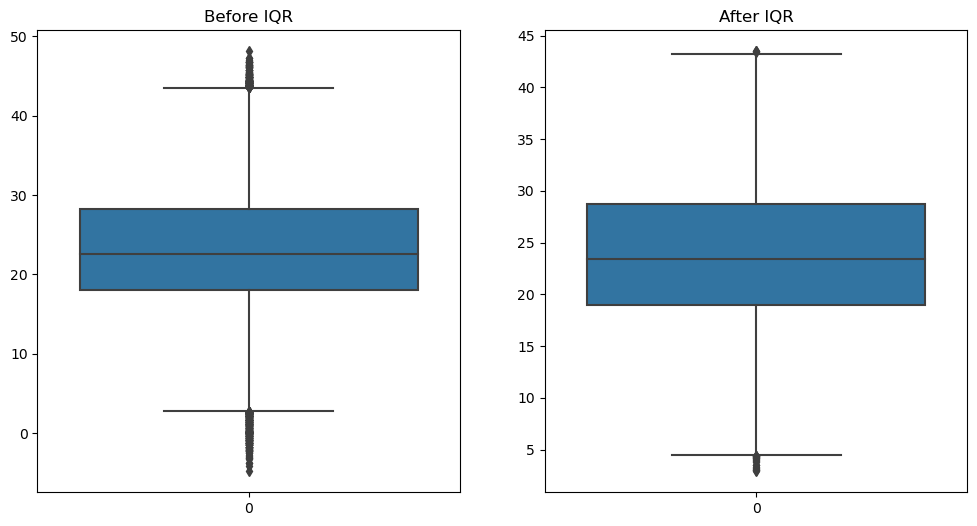

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df['MaxTemp'])
plt.title("Before IQR")

plt.subplot(1,2,2)
sns.boxplot(data=df_clean['MaxTemp'])
plt.title("After IQR")

plt.show()


In [12]:
# Clean text columns
text_columns = df.select_dtypes(include=['object']).columns
print(f"Text columns to clean: {list(text_columns)}")

for col in text_columns:
    # Remove extra spaces and make consistent
    df[col] = df[col].astype(str).str.strip().str.title()
    
print("Text data cleaned!")

Text columns to clean: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Text data cleaned!


In [13]:
#encoding
df["RainTomorrow"].unique() #label encoding

array(['No', 'Yes'], dtype=object)

In [14]:
df["RainToday"].unique() #label encoding

array(['No', 'Yes'], dtype=object)

In [15]:
df["Location"].unique() #one-hot

array(['Albury', 'Badgeryscreek', 'Cobar', 'Coffsharbour', 'Moree',
       'Newcastle', 'Norahhead', 'Norfolkisland', 'Penrith', 'Richmond',
       'Sydney', 'Sydneyairport', 'Waggawagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'Mountginini', 'Ballarat',
       'Bendigo', 'Sale', 'Melbourneairport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'Goldcoast', 'Townsville', 'Adelaide', 'Mountgambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'Pearceraaf', 'Perthairport',
       'Perth', 'Salmongums', 'Walpole', 'Hobart', 'Launceston',
       'Alicesprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [16]:
df['WindGustDir'].unique() #one-hot

array(['W', 'Wnw', 'Wsw', 'Ne', 'Nnw', 'N', 'Nne', 'Sw', 'Ene', 'Sse',
       'S', 'Nw', 'Se', 'Ese', 'E', 'Ssw'], dtype=object)

In [17]:
df["WindDir9am"].unique() #one-hot

array(['W', 'Nnw', 'Se', 'Ene', 'Sw', 'Sse', 'S', 'Ne', 'N', 'Ssw', 'Wsw',
       'Ese', 'E', 'Nw', 'Wnw', 'Nne'], dtype=object)

In [18]:
df['WindDir3pm'].unique() #one-hot

array(['Wnw', 'Wsw', 'E', 'Nw', 'W', 'Sse', 'Ese', 'Ene', 'Nnw', 'Ssw',
       'Sw', 'Se', 'N', 'S', 'Nne', 'Ne'], dtype=object)

In [19]:
#1-label encoding in RainTomorrow and RainToday
df["RainTomorrow"]=df["RainTomorrow"].map({'Yes':1,'No':0})
df["RainToday"]=df["RainToday"].map({'Yes':1,'No':0})


In [20]:
#one-hot encoding
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


# LabelEncoder
le = LabelEncoder()

# نطبق على كل عمود categorical
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print(df.head())



        Date  Location  MinTemp  MaxTemp  Rainfall  WindGustDir  \
0 2008-12-01         2     13.4     22.9       0.6           13   
1 2008-12-02         2      7.4     25.1       0.0           14   
2 2008-12-03         2     12.9     25.7       0.0           15   
3 2008-12-04         2      9.2     28.0       0.0            4   
4 2008-12-05         2     17.5     32.3       1.0           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   
4           41.0           1           7           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     16.9     21.8   
1         44.0

In [21]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler

# def split_and_scale(df, target_col, test_size=0.2, random_state=42):

#     X = df.drop(target_col, axis=1)
#     y = df[target_col]

#     # split
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=test_size, random_state=random_state
#     )

#     numeric_cols = X_train.select_dtypes(include=['float64']).columns

#     # scaling
#     scaler = MinMaxScaler()
#     X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
#     X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#     return X_train, X_test, y_train, y_test, scaler


In [24]:
os.makedirs("datasets/clean", exist_ok=True)
df.to_csv("datasets/clean/processedtrain.csv", index=False)


In [23]:
###################